In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error

In [197]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [587]:
train_cpy = train
test_cpy = test

In [588]:
print(train_cpy.shape)
print(test_cpy.shape)

(19237, 18)
(8245, 20)


In [589]:
train_cpy = train_cpy.drop(['ID'], axis = 1)
train_cpy.describe()

,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,4.582991,6.582627
std,1.905813e+05,5.668673,1.199933,4.320168
min,1.000000e+00,1939.000000,1.000000,0.000000
25%,5.331000e+03,2009.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,4.000000,6.000000
75%,2.207500e+04,2015.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,16.000000,16.000000


count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x257007f5670>,
 'caps': [<matplotlib.lines.Line2D at 0x257007f5d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x257007f5310>],
 'medians': [<matplotlib.lines.Line2D at 0x25700800460>],
 'fliers': [<matplotlib.lines.Line2D at 0x257008007c0>],
 'means': []}

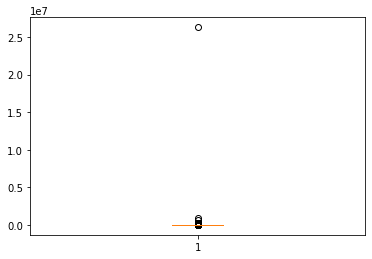

In [590]:
print(train_cpy['Price'].describe())

plt.boxplot(train_cpy["Price"])

In [591]:
train_cpy.loc[train_cpy.duplicated()].head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
192,314,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,149486 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
239,2901,503,HONDA,Civic,2012,Sedan,Yes,Hybrid,1.5,146403 km,4.0,Automatic,Front,04-May,Left wheel,White,0
264,392,1017,MERCEDES-BENZ,E 300,2017,Sedan,Yes,Petrol,2,1600 km,4.0,Automatic,Rear,04-May,Left wheel,Black,12
331,282,289,FORD,Escape,2008,Jeep,Yes,Hybrid,0.4,220474 km,4.0,Automatic,Front,04-May,Left wheel,Grey,0
347,39829,1811,LEXUS,GX 460,2010,Jeep,Yes,Petrol,4.6,155821 km,8.0,Automatic,4x4,04-May,Left wheel,Black,0


In [592]:
# Duplicated rows

train_cpy[(train_cpy['Manufacturer'] == 'MERCEDES-BENZ') & (train_cpy['Model'] == 'E 350') & (train_cpy['Mileage'] == '184467 km')]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
10,941,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,184467 km,6.0,Automatic,Rear,04-May,Left wheel,White,12
9108,941,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,184467 km,6.0,Automatic,Rear,04-May,Left wheel,White,12
17349,941,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,184467 km,6.0,Automatic,Rear,04-May,Left wheel,White,12
18177,941,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,184467 km,6.0,Automatic,Rear,04-May,Left wheel,White,12


In [593]:
train_cpy[(train_cpy['Manufacturer'] == 'HONDA') & (train_cpy['Model'] == 'Civic') & (train_cpy['Mileage'] == '146403 km')]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
135,2901,503,HONDA,Civic,2012,Sedan,Yes,Hybrid,1.5,146403 km,4.0,Automatic,Front,04-May,Left wheel,White,0
239,2901,503,HONDA,Civic,2012,Sedan,Yes,Hybrid,1.5,146403 km,4.0,Automatic,Front,04-May,Left wheel,White,0
5304,2901,503,HONDA,Civic,2012,Sedan,Yes,Hybrid,1.5,146403 km,4.0,Automatic,Front,04-May,Left wheel,White,0
6458,2352,503,HONDA,Civic,2012,Jeep,Yes,Hybrid,1.5,146403 km,4.0,Automatic,Front,04-May,Left wheel,White,0
14846,2901,503,HONDA,Civic,2012,Sedan,Yes,Hybrid,1.5,146403 km,4.0,Automatic,Front,04-May,Left wheel,White,0
16583,2901,503,HONDA,Civic,2012,Jeep,Yes,Hybrid,1.5,146403 km,4.0,Automatic,Front,04-May,Left wheel,White,0


In [594]:
print(train_cpy.shape)

train_cpy_unique = train_cpy.drop_duplicates()

print(train_cpy_unique.shape)

(19237, 17)
(15725, 17)


In [595]:
print(train_cpy_unique['Price'].quantile(0.10))
print(train_cpy_unique['Price'].quantile(0.90))

1490.0
39866.200000000026


In [596]:
train_cpy_unique['Price'] = np.where(train_cpy_unique['Price'] < 1490.0, 1490.0, train_cpy_unique['Price'])
train_cpy_unique['Price'] = np.where(train_cpy_unique['Price'] > 39866.2, 39866.2, train_cpy_unique['Price'])

print(train_cpy_unique['Price'].skew())

0.6571617731529633


<ipython-input-596-f68e699ada86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cpy_unique['Price'] = np.where(train_cpy_unique['Price'] < 1490.0, 1490.0, train_cpy_unique['Price'])
<ipython-input-596-f68e699ada86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cpy_unique['Price'] = np.where(train_cpy_unique['Price'] > 39866.2, 39866.2, train_cpy_unique['Price'])


In [597]:
train_cpy_unique.head(1)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [598]:
train_cpy_unique.Manufacturer.unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [599]:
train_cpy_unique[train_cpy_unique['Levy'] == '-'].head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,8467.0,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
9,26657.0,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
11,8781.0,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0


In [600]:
train_cpy_unique['Levy'] = train_cpy_unique.Levy.str.replace('-', '0')
train_cpy_unique['Levy'] = train_cpy_unique['Levy'].astype(int)

<ipython-input-600-20601ca700cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cpy_unique['Levy'] = train_cpy_unique.Levy.str.replace('-', '0')
<ipython-input-600-20601ca700cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cpy_unique['Levy'] = train_cpy_unique['Levy'].astype(int)


In [601]:
train_cpy_unique.groupby('Manufacturer', as_index = False).agg({'Levy':'mean'}).sort_values(by = 'Levy', ascending = False)

,Manufacturer,Levy
14,FERRARI,2248.500000
29,LAMBORGHINI,2067.000000
18,GMC,1505.461538
4,BENTLEY,1409.500000
0,ACURA,1039.666667
...,...,...
20,HAVAL,0.000000
1,ALFA ROMEO,0.000000
30,LANCIA,0.000000
2,ASTON MARTIN,0.000000


In [602]:
train_cpy_unique.groupby('Manufacturer', as_index = False).size().sort_values(by = 'size', ascending = False)

,Manufacturer,size
23,HYUNDAI,3050
58,TOYOTA,2863
36,MERCEDES-BENZ,1451
8,CHEVROLET,968
16,FORD,956
...,...,...
44,PONTIAC,1
29,LAMBORGHINI,1
2,ASTON MARTIN,1
30,LANCIA,1


In [603]:
train_cpy_unique.groupby(['Manufacturer', 'Model'], as_index = False).agg({'Price':'mean'}).sort_values(by = 'Price', ascending = False)

,Manufacturer,Model,Price
1464,TOYOTA,RAV 4 LIMITED,39866.2
1479,TOYOTA,Tacoma TRD Off Road,39866.2
969,MERCEDES-BENZ,ML 550 4.7,39866.2
155,BMW,650 450 HP,39866.2
1236,PORSCHE,Panamera 4,39866.2
...,...,...,...
1415,TOYOTA,Land Cruiser 105,1490.0
1101,NISSAN,Armada,1490.0
946,MERCEDES-BENZ,GLS 63 AMG,1490.0
1576,VOLKSWAGEN,T3 0000,1490.0


In [604]:
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 3)
    upper_limit = s.mean() + (s.std() * 3)
    return ~s.between(lower_limit, upper_limit)

train_cpy_outlier_rem = train_cpy_unique[~train_cpy_unique.groupby('Manufacturer')['Price'].apply(is_outlier)]

In [605]:
print(train_cpy_unique.shape)
print(train_cpy_outlier_rem.shape)

(15725, 17)
(15682, 17)


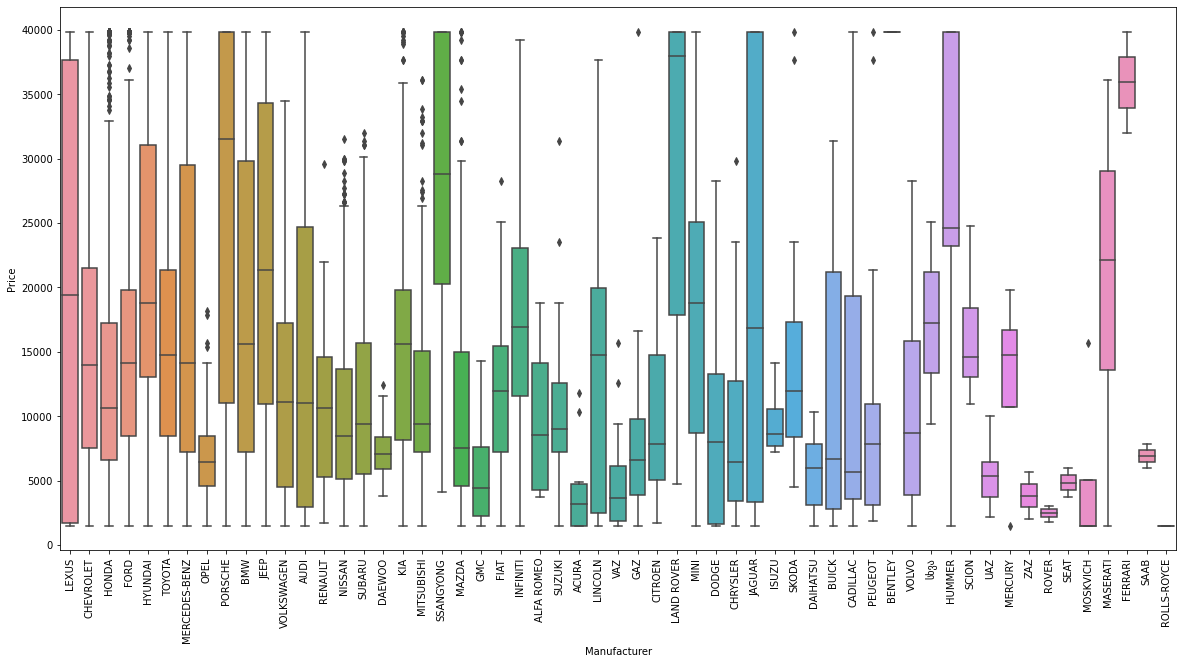

In [606]:
data = pd.concat([train_cpy_outlier_rem['Price'], train_cpy_outlier_rem['Manufacturer']], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=train_cpy_outlier_rem['Manufacturer'], y="Price", data=data)
plt.xticks(rotation=90);

In [607]:
train_cpy_outlier_rem.describe()

,Price,Levy,Prod. year,Cylinders,Airbags
count,15682.000000,15682.000000,15682.000000,15682.000000,15682.000000
mean,16570.336284,561.789823,2010.505675,4.482974,6.541130
std,11807.847583,559.017060,6.010152,1.133687,4.065577
min,1490.000000,0.000000,1939.000000,1.000000,0.000000
25%,7527.000000,0.000000,2008.000000,4.000000,4.000000
50%,14113.000000,639.000000,2012.000000,4.000000,6.000000
75%,23207.000000,862.000000,2014.000000,4.000000,12.000000
max,39866.200000,11714.000000,2020.000000,16.000000,16.000000


In [608]:
train_cpy_outlier_rem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15682 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15682 non-null  float64
 1   Levy              15682 non-null  int32  
 2   Manufacturer      15682 non-null  object 
 3   Model             15682 non-null  object 
 4   Prod. year        15682 non-null  int64  
 5   Category          15682 non-null  object 
 6   Leather interior  15682 non-null  object 
 7   Fuel type         15682 non-null  object 
 8   Engine volume     15682 non-null  object 
 9   Mileage           15682 non-null  object 
 10  Cylinders         15682 non-null  float64
 11  Gear box type     15682 non-null  object 
 12  Drive wheels      15682 non-null  object 
 13  Doors             15682 non-null  object 
 14  Wheel             15682 non-null  object 
 15  Color             15682 non-null  object 
 16  Airbags           15682 non-null  int64 

In [609]:
train_cpy = train_cpy_outlier_rem

train_cpy.head(1)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [610]:
train_cpy['Engine volume'] = train_cpy['Engine volume'].astype(str)

train_cpy['Engine_volume_category'] = train_cpy['Engine volume'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

train_cpy['Engine_volume_value'] = train_cpy['Engine volume'].str[:3]

train_cpy['Engine_volume_value'] = train_cpy['Engine_volume_value'].astype(float)

train_cpy["Engine_volume_category"].fillna('Non-Turbo', inplace = True)

train_cpy = train_cpy.drop(['Engine volume'], axis = 1)

train_cpy.info()

train_cpy.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15682 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   15682 non-null  float64
 1   Levy                    15682 non-null  int32  
 2   Manufacturer            15682 non-null  object 
 3   Model                   15682 non-null  object 
 4   Prod. year              15682 non-null  int64  
 5   Category                15682 non-null  object 
 6   Leather interior        15682 non-null  object 
 7   Fuel type               15682 non-null  object 
 8   Mileage                 15682 non-null  object 
 9   Cylinders               15682 non-null  float64
 10  Gear box type           15682 non-null  object 
 11  Drive wheels            15682 non-null  object 
 12  Doors                   15682 non-null  object 
 13  Wheel                   15682 non-null  object 
 14  Color                   15682 non-null

<ipython-input-610-33b842b2c5d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cpy['Engine volume'] = train_cpy['Engine volume'].astype(str)
<ipython-input-610-33b842b2c5d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cpy['Engine_volume_category'] = train_cpy['Engine volume'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()
<ipython-input-610-33b842b2c5d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine_volume_category,Engine_volume_value
19230,1490.0,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,307325 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12,Non-Turbo,1.8
19232,8467.0,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,Turbo,2.0
19233,15681.0,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,Non-Turbo,2.4
19234,26108.0,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,Non-Turbo,2.0
19236,1490.0,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12,Non-Turbo,2.4


In [611]:
train_cpy['Mileage'] = train_cpy['Mileage'].str.replace('[a-z]', '').astype(int)

In [612]:
train_cpy.describe()

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Engine_volume_value
count,15682.000000,15682.000000,15682.000000,1.568200e+04,15682.000000,15682.000000,15682.000000
mean,16570.336284,561.789823,2010.505675,1.841308e+06,4.482974,6.541130,2.212645
std,11807.847583,559.017060,6.010152,5.360574e+07,1.133687,4.065577,0.805411
min,1490.000000,0.000000,1939.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,7527.000000,0.000000,2008.000000,6.691650e+04,4.000000,4.000000,1.700000
50%,14113.000000,639.000000,2012.000000,1.210000e+05,4.000000,6.000000,2.000000
75%,23207.000000,862.000000,2014.000000,1.800000e+05,4.000000,12.000000,2.500000
max,39866.200000,11714.000000,2020.000000,2.147484e+09,16.000000,16.000000,20.000000


In [613]:
train_cpy.Mileage.describe()

count    1.568200e+04
mean     1.841308e+06
std      5.360574e+07
min      0.000000e+00
25%      6.691650e+04
50%      1.210000e+05
75%      1.800000e+05
max      2.147484e+09
Name: Mileage, dtype: float64

In [614]:
# Price = train_cpy['Price']
# Mileage = train_cpy['Mileage']

# train_cpy['logprice'] = np.log(train_cpy['Price'])
# train_cpy['logmileage'] = np.log(train_cpy['Mileage'])

# train_cpy = train_cpy.drop(['Price', 'Mileage'], axis = 1)

# train_cpy.head()

In [615]:
train_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15682 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   15682 non-null  float64
 1   Levy                    15682 non-null  int32  
 2   Manufacturer            15682 non-null  object 
 3   Model                   15682 non-null  object 
 4   Prod. year              15682 non-null  int64  
 5   Category                15682 non-null  object 
 6   Leather interior        15682 non-null  object 
 7   Fuel type               15682 non-null  object 
 8   Mileage                 15682 non-null  int32  
 9   Cylinders               15682 non-null  float64
 10  Gear box type           15682 non-null  object 
 11  Drive wheels            15682 non-null  object 
 12  Doors                   15682 non-null  object 
 13  Wheel                   15682 non-null  object 
 14  Color                   15682 non-null

<AxesSubplot:title={'center':'Price'}, xlabel='Engine_volume_category'>

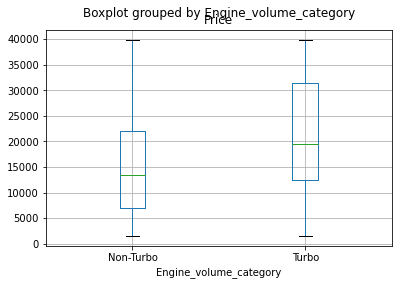

In [616]:
train_cpy.boxplot(column='Price', by='Engine_volume_category')

C:\Users\kashyap.barua\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


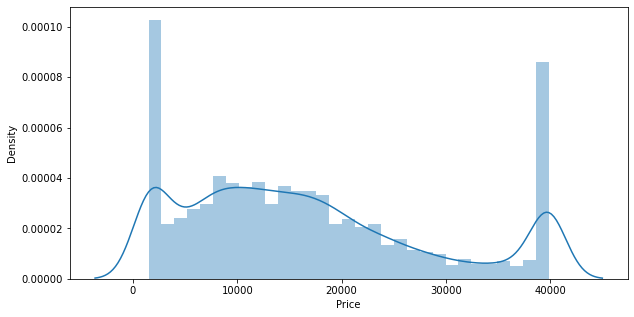

In [617]:
f, ax = plt.subplots(figsize=(10,5))
sns.distplot(train_cpy['Price'])
plt.show()

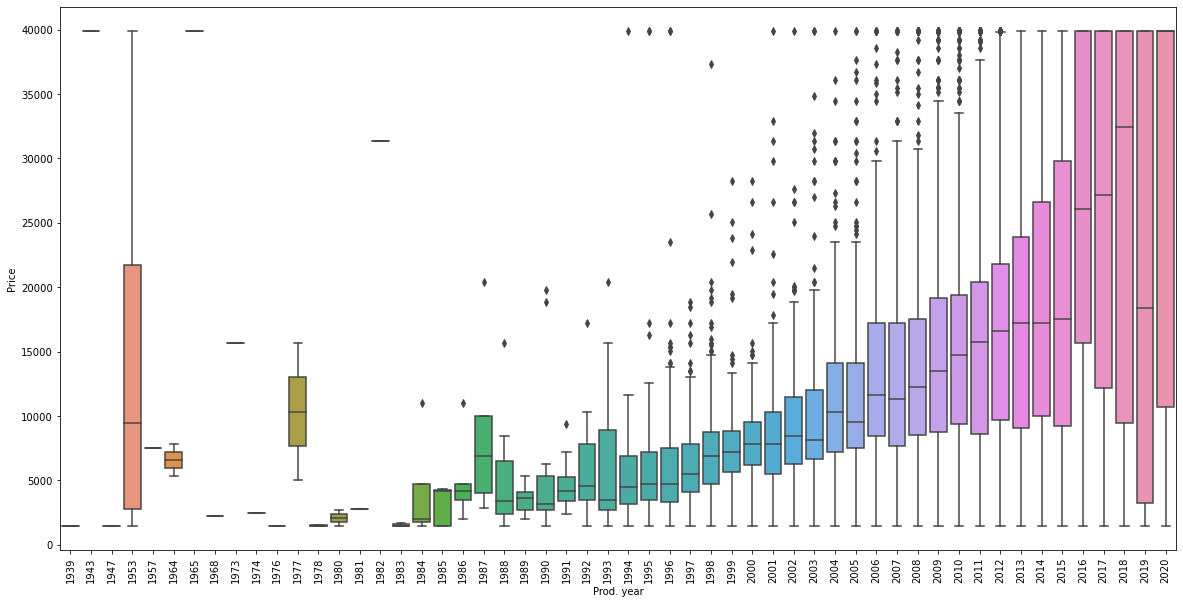

In [618]:
data = pd.concat([train_cpy['Price'], train_cpy['Prod. year']], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=train_cpy['Prod. year'], y="Price", data=data)
plt.xticks(rotation=90);

<Figure size 1440x720 with 0 Axes>

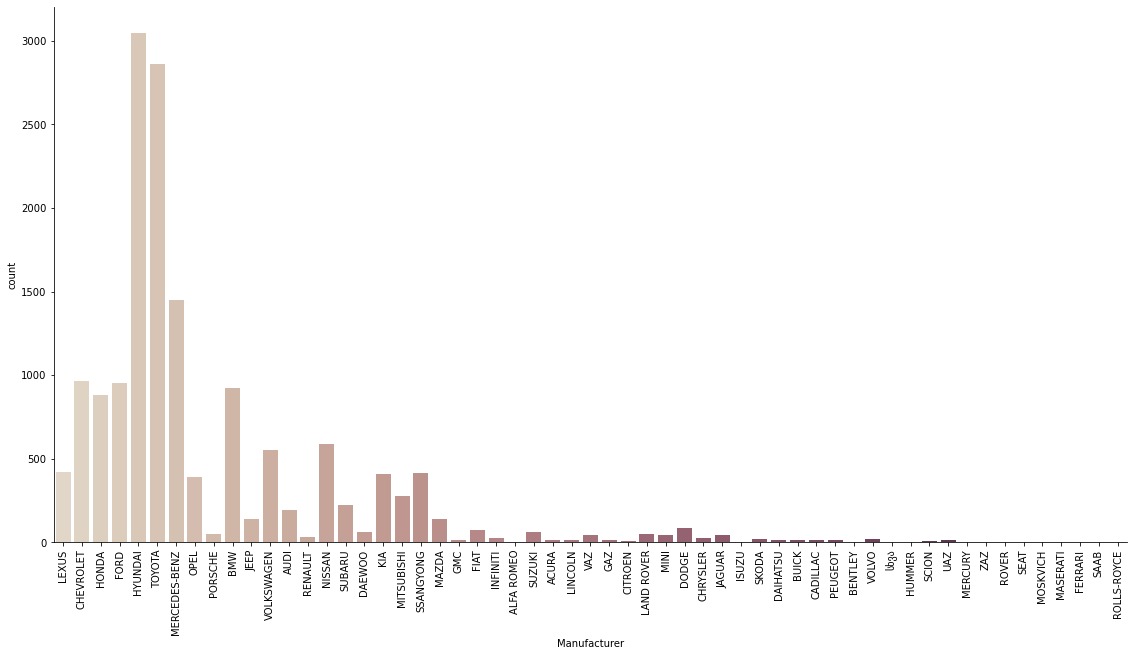

In [619]:
plt.figure(figsize=(20, 10))
sns.catplot(x="Manufacturer", kind="count", palette="ch:.25", height=8, aspect=2, data=train_cpy);
plt.xticks(rotation=90);

In [620]:
train_cat = train_cpy.select_dtypes(include=['object']).columns
train_num = train_cpy.select_dtypes(exclude=['object']).columns

print(train_cat)
print(train_num)

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Engine_volume_category'],
      dtype='object')
Index(['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags',
       'Engine_volume_value'],
      dtype='object')


In [621]:
# Rename all columns

train_cpy = train_cpy.rename(columns={'Leather interior': 'Leather_Interior',
                                     'Fuel type': 'Fuel_Type', 'Gear box type': 'Gear_Box_Type',
                                     'Drive wheels': 'Drive_Wheels', 'Prod. year': 'Prod_Year'})

In [622]:
train_cpy[train_cpy['Doors'] == '>5'].head()

,Price,Levy,Manufacturer,Model,Prod_Year,Category,Leather_Interior,Fuel_Type,Mileage,Cylinders,Gear_Box_Type,Drive_Wheels,Doors,Wheel,Color,Airbags,Engine_volume_category,Engine_volume_value
171,1490.0,0,AUDI,50,2018,Coupe,Yes,Petrol,4000,1.0,Tiptronic,Rear,>5,Right-hand drive,Blue,0,Non-Turbo,0.5
276,20385.0,738,CHEVROLET,Cruze,2017,Sedan,No,Petrol,42000,4.0,Tiptronic,Front,>5,Left wheel,Black,12,Turbo,1.4
678,7213.0,0,BMW,525,1998,Sedan,No,Petrol,100000,6.0,Manual,Rear,>5,Left wheel,Silver,6,Non-Turbo,2.5
829,30000.0,0,NISSAN,X-Trail,2018,Pickup,Yes,Petrol,18794,12.0,Automatic,4x4,>5,Left wheel,Black,12,Non-Turbo,2.5
870,19757.0,810,HYUNDAI,Elantra,2016,Sedan,No,Petrol,113600,4.0,Tiptronic,Front,>5,Left wheel,Grey,6,Non-Turbo,1.8


In [623]:
var = 'Manufacturer'
train_cpy[var].value_counts()

HYUNDAI          3050
TOYOTA           2863
MERCEDES-BENZ    1451
CHEVROLET         968
FORD              956
BMW               924
HONDA             881
NISSAN            587
VOLKSWAGEN        550
LEXUS             421
SSANGYONG         415
KIA               410
OPEL              394
MITSUBISHI        279
SUBARU            226
AUDI              194
MAZDA             141
JEEP              138
DODGE              88
FIAT               76
SUZUKI             65
DAEWOO             61
PORSCHE            52
LAND ROVER         48
MINI               47
VAZ                46
JAGUAR             42
RENAULT            35
INFINITI           26
CHRYSLER           26
SKODA              20
VOLVO              19
PEUGEOT            17
BUICK              16
LINCOLN            15
ACURA              14
CADILLAC           14
DAIHATSU           13
GMC                12
UAZ                12
GAZ                12
CITROEN             9
SCION               7
HUMMER              5
ALFA ROMEO          4
ISUZU     

In [624]:
var = 'Model'
train_cpy[var].value_counts()

Prius                  946
Sonata                 821
Elantra                720
Camry                  581
Santa FE               486
                      ... 
ES 300 hybrid            1
Sprinter 411             1
Cooper S Cabrio R56      1
Vito 111                 1
CLK 55 AMG               1
Name: Model, Length: 1573, dtype: int64

In [625]:
var = 'Category'
train_cpy[var].value_counts()

Sedan          7000
Jeep           4205
Hatchback      2547
Minivan         531
Coupe           474
Universal       310
Microbus        294
Goods wagon     227
Pickup           48
Cabriolet        35
Limousine        11
Name: Category, dtype: int64

In [626]:
var = 'Leather_Interior'
train_cpy[var].value_counts()

Yes    10536
No      5146
Name: Leather_Interior, dtype: int64

In [627]:
var = 'Fuel_Type'
train_cpy[var].value_counts()

Petrol            8790
Diesel            3202
Hybrid            2423
LPG                714
CNG                467
Plug-in Hybrid      85
Hydrogen             1
Name: Fuel_Type, dtype: int64

In [628]:
var = 'Gear_Box_Type'
train_cpy[var].value_counts()

Automatic    10072
Tiptronic     3051
Manual        1829
Variator       730
Name: Gear_Box_Type, dtype: int64

In [629]:
var = 'Drive_Wheels'
train_cpy[var].value_counts()

Front    10969
4x4       2747
Rear      1966
Name: Drive_Wheels, dtype: int64

In [630]:
var = 'Doors'
train_cpy[var].value_counts()

04-May    14819
02-Mar      740
>5          123
Name: Doors, dtype: int64

In [631]:
var = 'Wheel'
train_cpy[var].value_counts()

Left wheel          14250
Right-hand drive     1432
Name: Wheel, dtype: int64

In [632]:
var = 'Color'
train_cpy[var].value_counts()

Black            3827
White            3597
Silver           3144
Grey             1912
Blue             1243
Red               564
Green             287
Orange            204
Carnelian red     177
Brown             172
Golden            141
Beige             134
Sky blue          122
Yellow             94
Purple             39
Pink               25
Name: Color, dtype: int64

In [633]:
var = 'Engine_volume_category'
train_cpy[var].value_counts()

Non-Turbo    13806
Turbo         1876
Name: Engine_volume_category, dtype: int64

<Figure size 1440x720 with 0 Axes>

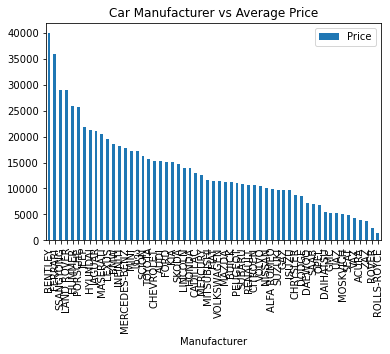

In [634]:
plt.figure(figsize=(20, 10))

df_autox = pd.DataFrame(train_cpy.groupby(['Manufacturer'])['Price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Manufacturer vs Average Price')
plt.show()

In [635]:
train_cpy.head()

,Price,Levy,Manufacturer,Model,Prod_Year,Category,Leather_Interior,Fuel_Type,Mileage,Cylinders,Gear_Box_Type,Drive_Wheels,Doors,Wheel,Color,Airbags,Engine_volume_category,Engine_volume_value
0,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,Non-Turbo,3.5
1,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,Non-Turbo,3.0
2,8467.0,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,Non-Turbo,1.3
3,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,Non-Turbo,2.5
4,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,Non-Turbo,1.3


In [636]:
# #Binning the Car Companies based prices

# bins = [0, 7527, 14113, 23207, 1000000]
# labels = ['Budget', 'Mid-Range', 'Expensive', 'Luxury']

# train_cpy['Price_Bucket'] = pd.cut(train_cpy['Price'], bins, labels = labels)

# train_cpy.drop(['Price_Bucket'], axis = 1)

In [637]:
# train_cpy.groupby('Price_Bucket').count()

<function matplotlib.pyplot.show(close=None, block=None)>

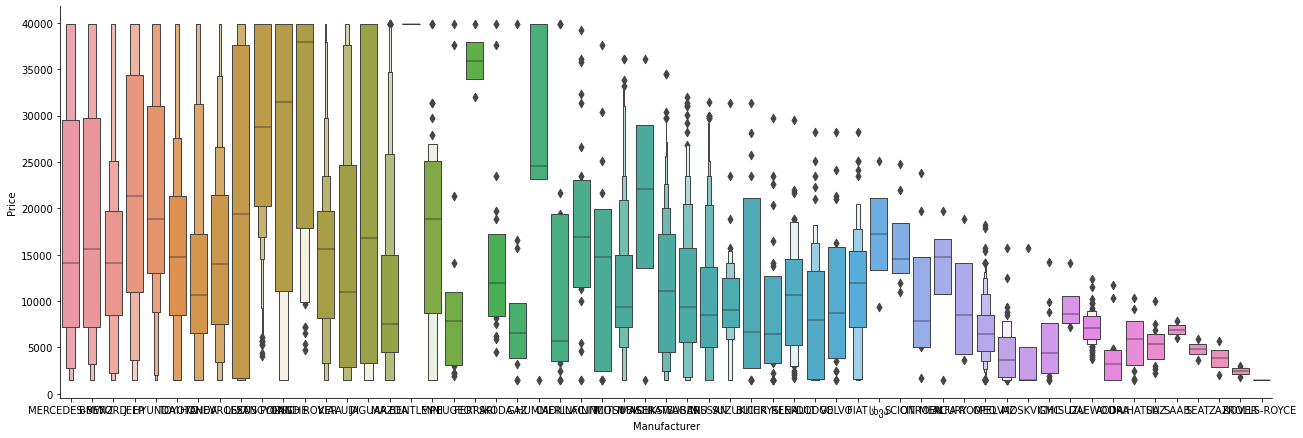

In [638]:
var = 'Manufacturer'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [639]:
# train_cpy.drop(['Manufacturer'],axis=1,inplace=True) # too much variability in the category

<function matplotlib.pyplot.show(close=None, block=None)>

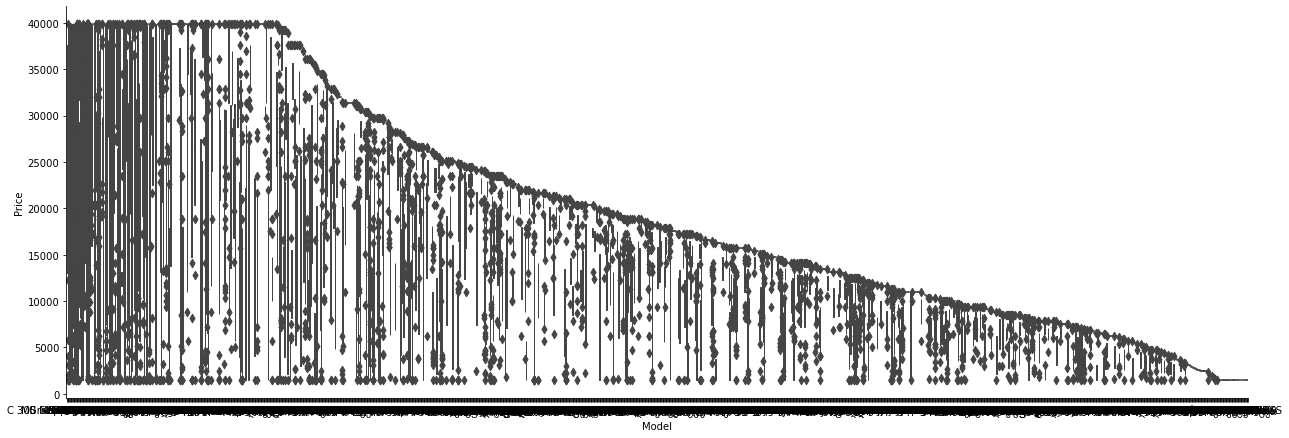

In [640]:
var = 'Model'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [642]:
train_cpy.drop(['Model'],axis=1,inplace=True) # too much variability in the category

KeyError: "['Model'] not found in axis"

<function matplotlib.pyplot.show(close=None, block=None)>

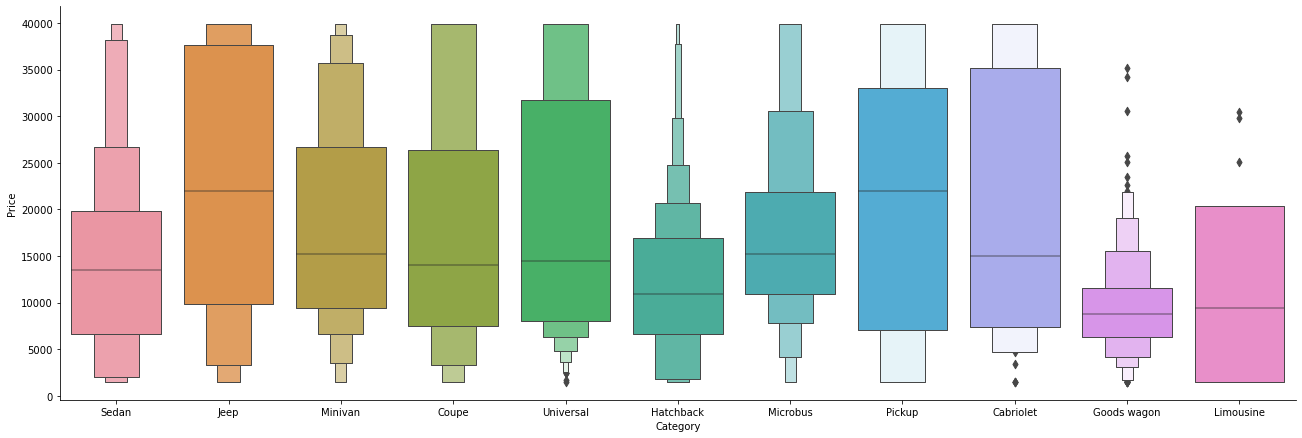

In [643]:
var = 'Category'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [644]:
Category = train_cpy[[var]]
Category = pd.get_dummies(Category,drop_first=True)
Category.head()

,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

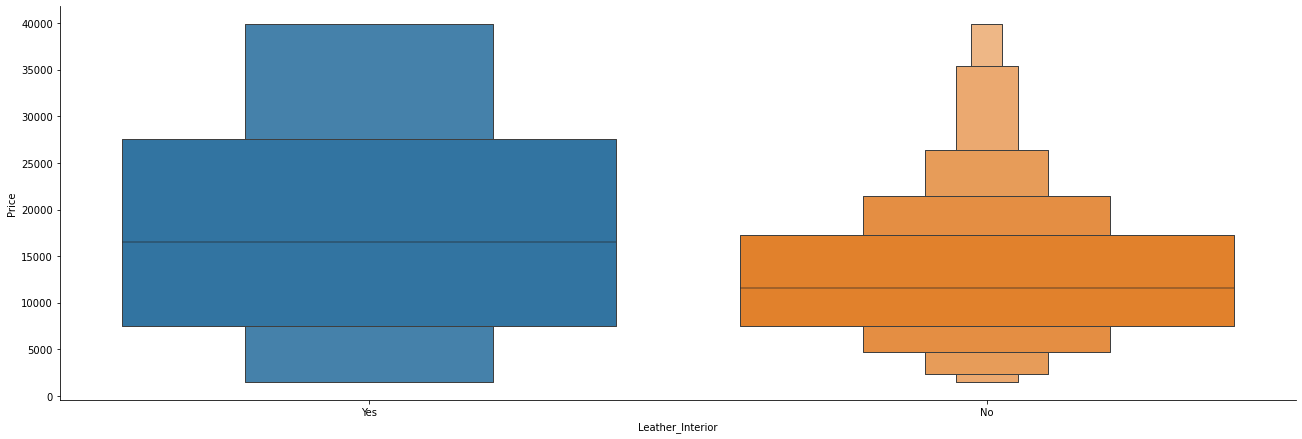

In [645]:
var = 'Leather_Interior'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [646]:
Leather_Interior = train_cpy[[var]]
Leather_Interior = pd.get_dummies(Leather_Interior,drop_first=True)
Leather_Interior.head()

,Leather_Interior_Yes
0,1
1,0
2,0
3,1
4,1


<function matplotlib.pyplot.show(close=None, block=None)>

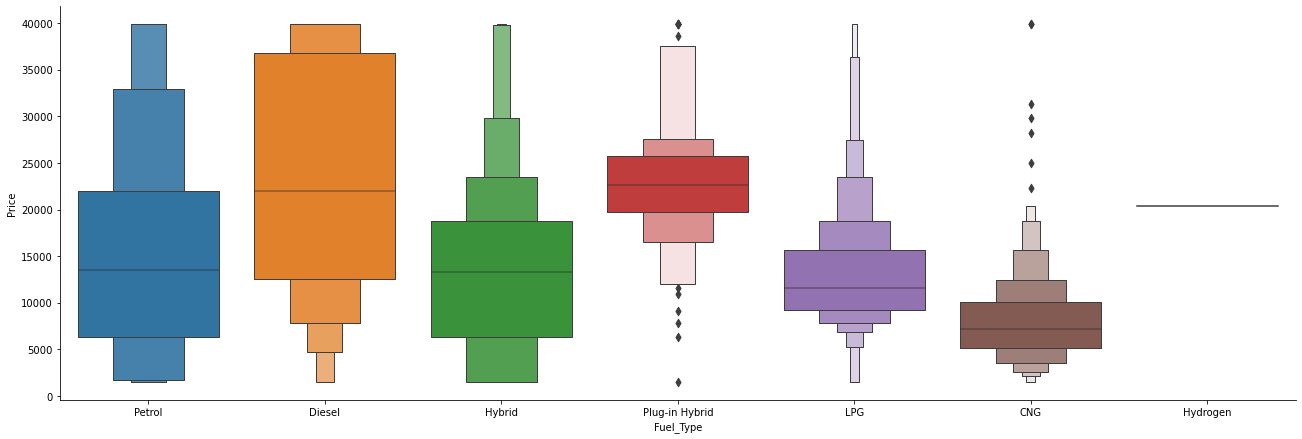

In [647]:
var = 'Fuel_Type'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [648]:
Fuel_Type = train_cpy[[var]]
Fuel_Type = pd.get_dummies(Fuel_Type,drop_first=True)
Fuel_Type.head()

,Fuel_Type_Diesel,Fuel_Type_Hybrid,Fuel_Type_Hydrogen,Fuel_Type_LPG,Fuel_Type_Petrol,Fuel_Type_Plug-in Hybrid
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,0,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

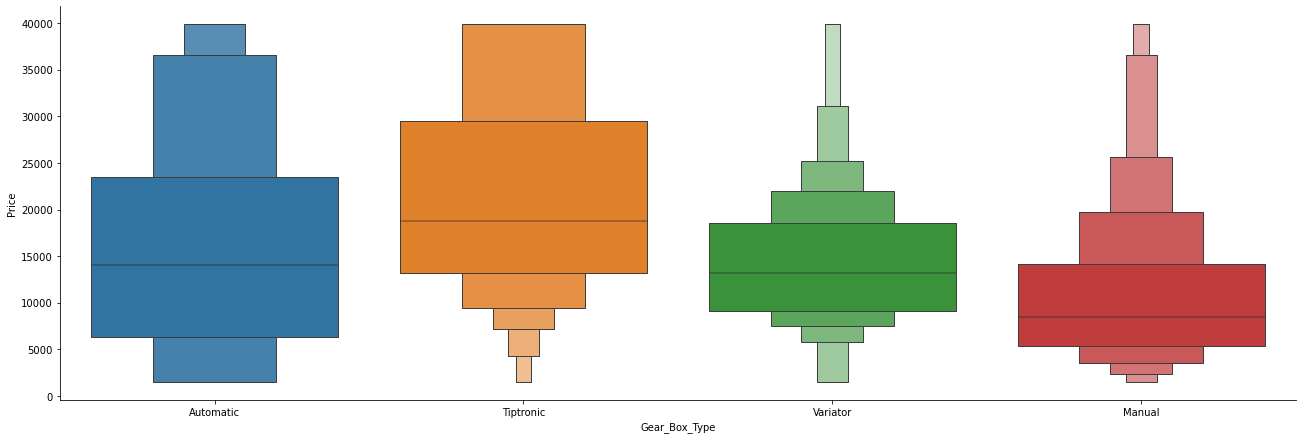

In [649]:
var = 'Gear_Box_Type'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [650]:
Gear_Box_Type = train_cpy[[var]]
Gear_Box_Type = pd.get_dummies(Gear_Box_Type,drop_first=True)
Gear_Box_Type.head()

,Gear_Box_Type_Manual,Gear_Box_Type_Tiptronic,Gear_Box_Type_Variator
0,0,0,0
1,0,1,0
2,0,0,1
3,0,0,0
4,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

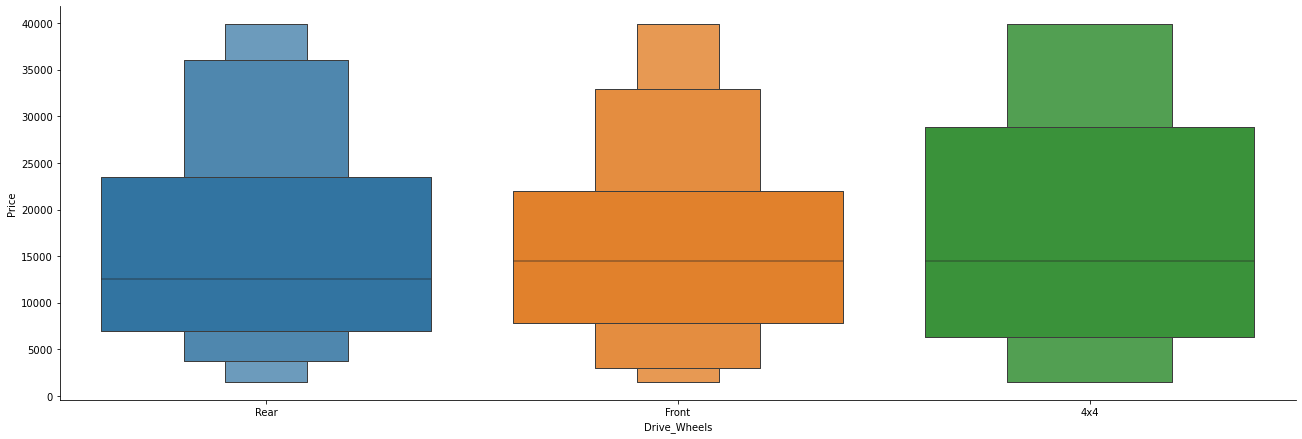

In [651]:
var = 'Drive_Wheels'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [652]:
Drive_Wheels = train_cpy[[var]]
Drive_Wheels = pd.get_dummies(Drive_Wheels,drop_first=True)
Drive_Wheels.head()

,Drive_Wheels_Front,Drive_Wheels_Rear
0,0,0
1,0,0
2,1,0
3,0,0
4,1,0


In [653]:
train_cpy['Doors'] = train_cpy['Doors'].apply(lambda x: x.replace('04-May','4'))
train_cpy['Doors'] = train_cpy['Doors'].apply(lambda x: x.replace('02-Mar','2'))

# train_cpy['Doors'] = train_cpy.Doors.str.replace('>5', '5')
# train_cpy['Doors'] = train_cpy['Doors'].astype(int)

<function matplotlib.pyplot.show(close=None, block=None)>

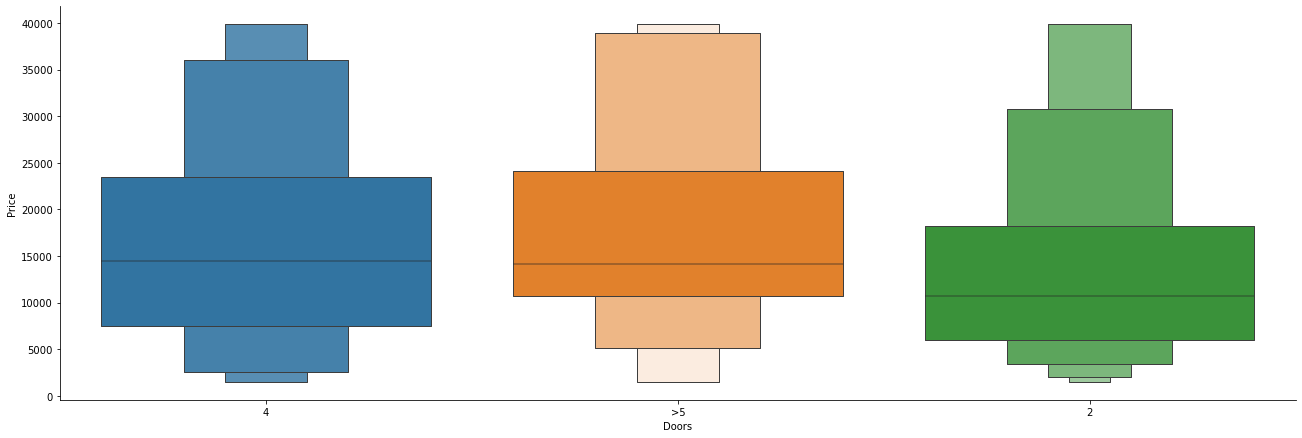

In [654]:
var = 'Doors'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [655]:
Doors = train_cpy[[var]]
Doors = pd.get_dummies(Doors,drop_first=True)
Doors.head()

,Doors_4,Doors_>5
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

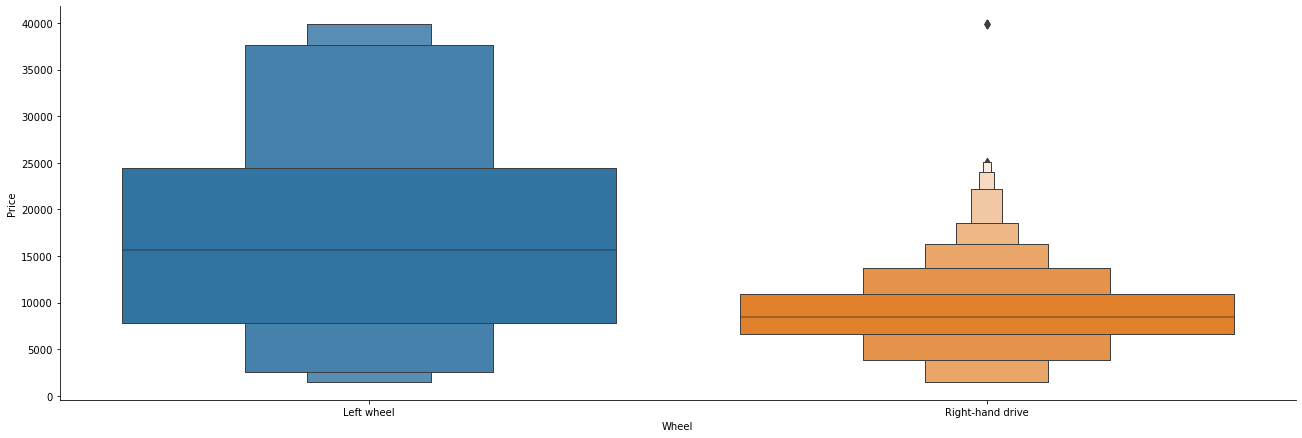

In [656]:
var = 'Wheel'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [657]:
Wheel = train_cpy[[var]]
Wheel = pd.get_dummies(Wheel,drop_first=True)
Wheel.head()

,Wheel_Right-hand drive
0,0
1,0
2,1
3,0
4,0


<function matplotlib.pyplot.show(close=None, block=None)>

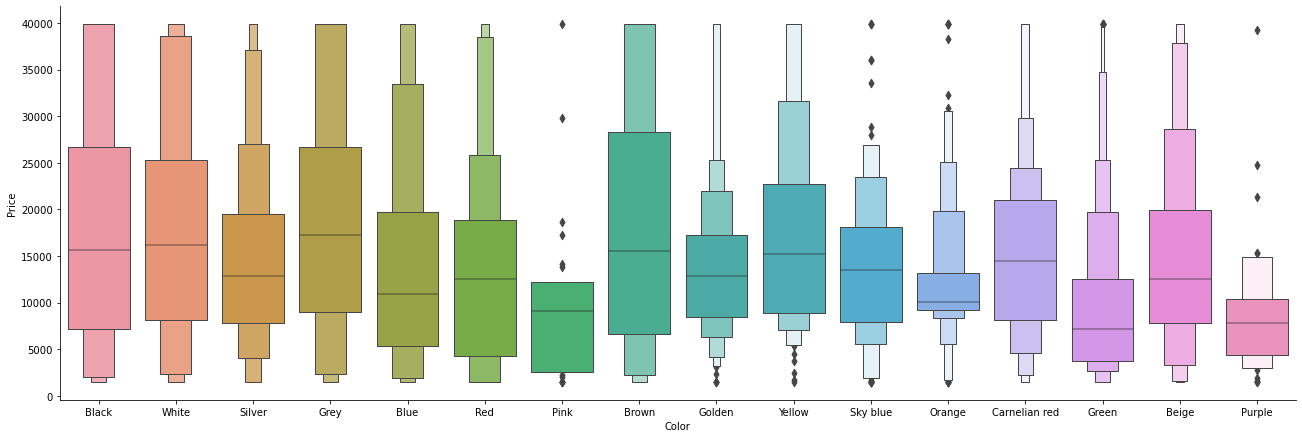

In [658]:
var = 'Color'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [659]:
Color = train_cpy[[var]]
Color = pd.get_dummies(Color,drop_first=True)
Color.head()

,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

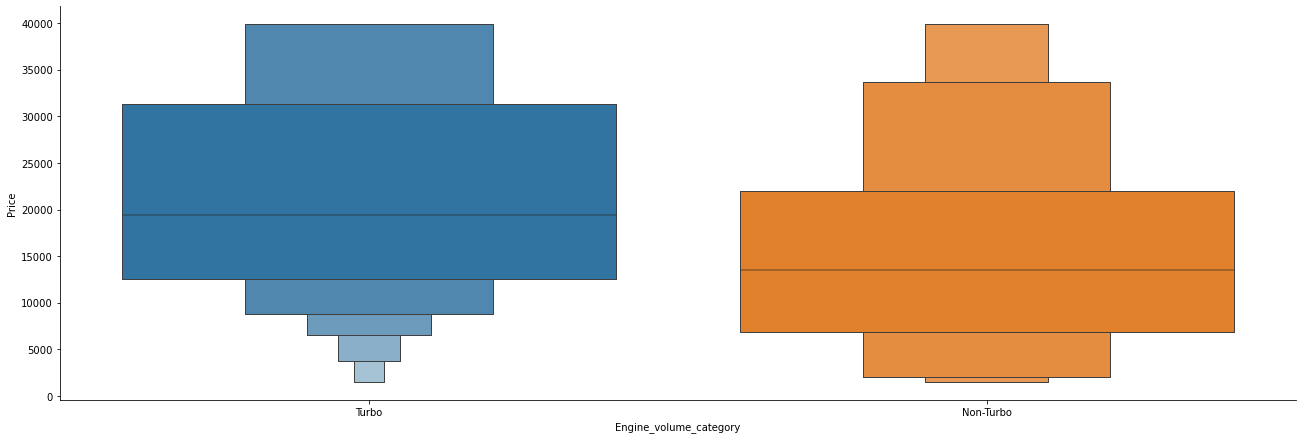

In [660]:
var = 'Engine_volume_category'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [661]:
Engine_volume_category = train_cpy[[var]]
Engine_volume_category = pd.get_dummies(Engine_volume_category,drop_first=True)
Engine_volume_category.head()

,Engine_volume_category_Turbo
0,0
1,0
2,0
3,0
4,0


In [664]:
list(set(train_cpy['Manufacturer']) - set(test_cpy['Manufacturer']))

# These need to be added to the test set

['ROLLS-ROYCE', 'SEAT']

In [665]:
list(set(test_cpy['Manufacturer']) - set(train_cpy['Manufacturer']))

# These are to be added to the train set

['TATA', 'FOTON', 'ASTON MARTIN', 'GREATWALL', 'TESLA', 'SATURN', 'MG']

In [668]:
var = 'Manufacturer'

Manufacturer = train_cpy[[var]]
Manufacturer = pd.get_dummies(Manufacturer,drop_first=True)

Manufacturer['Manufacturer_TATA'] = 0
Manufacturer['Manufacturer_FOTON'] = 0
Manufacturer['Manufacturer_ASTON MARTIN'] = 0
Manufacturer['Manufacturer_GREATWALL'] = 0
Manufacturer['Manufacturer_TESLA'] = 0
Manufacturer['Manufacturer_SATURN'] = 0
Manufacturer['Manufacturer_MG'] = 0

Manufacturer.head()

,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,Manufacturer_CHRYSLER,Manufacturer_CITROEN,Manufacturer_DAEWOO,...,Manufacturer_VOLVO,Manufacturer_ZAZ,Manufacturer_სხვა,Manufacturer_TATA,Manufacturer_FOTON,Manufacturer_ASTON MARTIN,Manufacturer_GREATWALL,Manufacturer_TESLA,Manufacturer_SATURN,Manufacturer_MG
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [669]:
train_cpy.head(1)

,Price,Levy,Manufacturer,Prod_Year,Category,Leather_Interior,Fuel_Type,Mileage,Cylinders,Gear_Box_Type,Drive_Wheels,Doors,Wheel,Color,Airbags,Engine_volume_category,Engine_volume_value
0,13328.0,1399,LEXUS,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,Non-Turbo,3.5


Bucket A: 15055 cars with Mileage above 1000
Bucket B: 627 cars with Mileage less than 1000

Further for Bucket B
602 cars with Mileage equal 0
25 cars with Mileage not equal 0 and less than 1000

In [445]:
# train_cpy[(train_cpy['Mileage'] != 0) & (train_cpy['Mileage'] < 1000)].head()

In [670]:
train_cpy[train_cpy.isna().any(axis=1)]

,Price,Levy,Manufacturer,Prod_Year,Category,Leather_Interior,Fuel_Type,Mileage,Cylinders,Gear_Box_Type,Drive_Wheels,Doors,Wheel,Color,Airbags,Engine_volume_category,Engine_volume_value


In [671]:
final_train = pd.concat([train_cpy, Category, Leather_Interior, Fuel_Type, Gear_Box_Type, Drive_Wheels,
                        Wheel, Color, Engine_volume_category, Manufacturer],axis=1)
final_train.head()

,Price,Levy,Manufacturer,Prod_Year,Category,Leather_Interior,Fuel_Type,Mileage,Cylinders,Gear_Box_Type,...,Manufacturer_VOLVO,Manufacturer_ZAZ,Manufacturer_სხვა,Manufacturer_TATA,Manufacturer_FOTON,Manufacturer_ASTON MARTIN,Manufacturer_GREATWALL,Manufacturer_TESLA,Manufacturer_SATURN,Manufacturer_MG
0,13328.0,1399,LEXUS,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,...,0,0,0,0,0,0,0,0,0,0
1,16621.0,1018,CHEVROLET,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,...,0,0,0,0,0,0,0,0,0,0
2,8467.0,0,HONDA,2006,Hatchback,No,Petrol,200000,4.0,Variator,...,0,0,0,0,0,0,0,0,0,0
3,3607.0,862,FORD,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,...,0,0,0,0,0,0,0,0,0,0
4,11726.0,446,HONDA,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,...,0,0,0,0,0,0,0,0,0,0


In [672]:
final_train.drop(['Category', 'Leather_Interior', 'Fuel_Type', 'Gear_Box_Type',
                 'Drive_Wheels', 'Wheel', 'Color', 'Engine_volume_category', 'Doors',
                 'Manufacturer'],axis=1,inplace=True)
final_train.head()

,Price,Levy,Prod_Year,Mileage,Cylinders,Airbags,Engine_volume_value,Category_Coupe,Category_Goods wagon,Category_Hatchback,...,Manufacturer_VOLVO,Manufacturer_ZAZ,Manufacturer_სხვა,Manufacturer_TATA,Manufacturer_FOTON,Manufacturer_ASTON MARTIN,Manufacturer_GREATWALL,Manufacturer_TESLA,Manufacturer_SATURN,Manufacturer_MG
0,13328.0,1399,2010,186005,6.0,12,3.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16621.0,1018,2011,192000,6.0,8,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8467.0,0,2006,200000,4.0,2,1.3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3607.0,862,2011,168966,4.0,0,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11726.0,446,2014,91901,4.0,4,1.3,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [673]:
print(train_cpy.shape)
print(train_cpy.info())

(15682, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15682 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   15682 non-null  float64
 1   Levy                    15682 non-null  int32  
 2   Manufacturer            15682 non-null  object 
 3   Prod_Year               15682 non-null  int64  
 4   Category                15682 non-null  object 
 5   Leather_Interior        15682 non-null  object 
 6   Fuel_Type               15682 non-null  object 
 7   Mileage                 15682 non-null  int32  
 8   Cylinders               15682 non-null  float64
 9   Gear_Box_Type           15682 non-null  object 
 10  Drive_Wheels            15682 non-null  object 
 11  Doors                   15682 non-null  object 
 12  Wheel                   15682 non-null  object 
 13  Color                   15682 non-null  object 
 14  Airbags                 15

In [674]:
test_cpy.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Engine_volume_category,Engine_volume_value
0,44020629,0,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN,Turbo,2.0
1,45784798,0,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN,Non-Turbo,2.4
2,45800257,0,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN,Non-Turbo,1.5
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN,Non-Turbo,3.2
4,45814303,0,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN,Non-Turbo,1.6


In [676]:
# test_cpy['Levy'] = test_cpy.Levy.str.replace('-', '0')
# test_cpy['Levy'] = test_cpy['Levy'].astype(int)

In [677]:
test_cpy['Engine volume'] = test_cpy['Engine volume'].astype(str)

test_cpy['Engine_volume_category'] = test_cpy['Engine volume'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

test_cpy['Engine_volume_value'] = test_cpy['Engine volume'].str[:3]

test_cpy['Engine_volume_value'] = test_cpy['Engine_volume_value'].astype(float)

test_cpy["Engine_volume_category"].fillna('Non-Turbo', inplace = True)

# test_cpy.info()

test_cpy.tail()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Engine_volume_category,Engine_volume_value
8240,44824410,1357,FIAT,Stilo,2004,Universal,No,Petrol,1.6,164000 km,4,Manual,Front,04-May,Left wheel,Blue,6,NaN,Non-Turbo,1.6
8241,45682346,0,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8 Turbo,156000 km,4,Tiptronic,Front,04-May,Left wheel,Black,6,NaN,Turbo,2.8
8242,45649860,1646,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907 km,8,Automatic,4x4,04-May,Left wheel,Black,0,NaN,Non-Turbo,4.6
8243,45809706,784,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000 km,4,Automatic,Front,04-May,Left wheel,Green,4,NaN,Non-Turbo,1.5
8244,45813163,448,HONDA,Insight,2012,Hatchback,Yes,Hybrid,1.3,321269 km,4,Automatic,Front,04-May,Left wheel,Red,12,NaN,Non-Turbo,1.3


In [678]:
test_cpy = test_cpy.drop(['Engine volume'], axis = 1)

In [679]:
test_cpy['Mileage'] = test_cpy['Mileage'].str.replace('[a-z]', '').astype(int)
    
test_cpy.head(3)

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Engine_volume_category,Engine_volume_value
0,44020629,0,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,0,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN,Turbo,2.0
1,45784798,0,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,26000,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN,Non-Turbo,2.4
2,45800257,0,NISSAN,Tiida,2005,Sedan,No,Petrol,168000,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN,Non-Turbo,1.5


In [69]:
# test_cpy.Mileage = test_cpy.Mileage.astype(str).astype(int)

In [680]:
# test_cpy = test_cpy.drop(['Price_Bucket'], axis = 1)

(test_cpy.isna().sum() * 100 / test_cpy.shape[0]).sort_values(ascending=False)

Price                     100.0
Engine_volume_value         0.0
Mileage                     0.0
Levy                        0.0
Manufacturer                0.0
Model                       0.0
Prod. year                  0.0
Category                    0.0
Leather interior            0.0
Fuel type                   0.0
Cylinders                   0.0
Engine_volume_category      0.0
Gear box type               0.0
Drive wheels                0.0
Doors                       0.0
Wheel                       0.0
Color                       0.0
Airbags                     0.0
ID                          0.0
dtype: float64

In [458]:
# test_cpy['Price_Bucket'] = pd.cut(test_cpy['Price'], bins, labels = labels)

In [681]:
# test_cpy.drop(['Manufacturer'],axis=1,inplace=True)
test_cpy.drop(['Model'],axis=1,inplace=True)
test_cpy.drop(['Price'],axis=1,inplace=True)

test_cpy = test_cpy.rename(columns={'Leather interior': 'Leather_Interior',
                                   'Fuel type': 'Fuel_Type',
                                   'Gear box type': 'Gear_Box_Type',
                                   'Drive wheels': 'Drive_Wheels',
                                   'Prod. year': 'Prod_Year'})
test_cpy.head()

,ID,Levy,Manufacturer,Prod_Year,Category,Leather_Interior,Fuel_Type,Mileage,Cylinders,Gear_Box_Type,Drive_Wheels,Doors,Wheel,Color,Airbags,Engine_volume_category,Engine_volume_value
0,44020629,0,VOLKSWAGEN,2012,Hatchback,No,Diesel,0,4,Manual,Front,02-Mar,Left wheel,Grey,10,Turbo,2.0
1,45784798,0,HYUNDAI,2012,Sedan,Yes,Petrol,26000,4,Tiptronic,Front,04-May,Left wheel,Grey,10,Non-Turbo,2.4
2,45800257,0,NISSAN,2005,Sedan,No,Petrol,168000,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,Non-Turbo,1.5
3,45797981,975,VOLVO,2012,Jeep,Yes,Petrol,143000,6,Automatic,4x4,04-May,Left wheel,Blue,12,Non-Turbo,3.2
4,45814303,0,OPEL,1993,Hatchback,No,Petrol,200000,4,Manual,Front,04-May,Left wheel,Black,0,Non-Turbo,1.6


In [682]:
test_cpy['Doors'] = test_cpy['Doors'].apply(lambda x: x.replace('04-May','4'))
test_cpy['Doors'] = test_cpy['Doors'].apply(lambda x: x.replace('02-Mar','2'))

In [683]:
var = 'Category'

Category = test_cpy[[var]]
Category = pd.get_dummies(Category,drop_first=True)
Category.head()

var = 'Leather_Interior'

Leather_Interior = test_cpy[[var]]
Leather_Interior = pd.get_dummies(Leather_Interior,drop_first=True)
Leather_Interior.head()

var = 'Fuel_Type'

Fuel_Type = test_cpy[[var]]
Fuel_Type = pd.get_dummies(Fuel_Type,drop_first=True)
Fuel_Type.head()

var = 'Gear_Box_Type'

Gear_Box_Type = test_cpy[[var]]
Gear_Box_Type = pd.get_dummies(Gear_Box_Type,drop_first=True)
Gear_Box_Type.head()

var = 'Drive_Wheels'

Drive_Wheels = test_cpy[[var]]
Drive_Wheels = pd.get_dummies(Drive_Wheels,drop_first=True)
Drive_Wheels.head()

var = 'Doors'

Doors = test_cpy[[var]]
Doors = pd.get_dummies(Doors,drop_first=True)
Doors.head()

var = 'Wheel'

Wheel = test_cpy[[var]]
Wheel = pd.get_dummies(Wheel,drop_first=True)
Wheel.head()

var = 'Color'

Color = test_cpy[[var]]
Color = pd.get_dummies(Color,drop_first=True)
Color.head()

var = 'Engine_volume_category'

Engine_volume_category = test_cpy[[var]]
Engine_volume_category = pd.get_dummies(Engine_volume_category,drop_first=True)
Engine_volume_category.head()

,Engine_volume_category_Turbo
0,1
1,0
2,0
3,0
4,0


In [705]:
var = 'Manufacturer'

Manufacturer = test_cpy[[var]]
Manufacturer = pd.get_dummies(Manufacturer, drop_first = True)

Manufacturer['Manufacturer_ROLLS-ROYCE'] = 0
Manufacturer['Manufacturer_SEAT'] = 0

Manufacturer.head()

,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,Manufacturer_CHRYSLER,Manufacturer_CITROEN,...,Manufacturer_TESLA,Manufacturer_TOYOTA,Manufacturer_UAZ,Manufacturer_VAZ,Manufacturer_VOLKSWAGEN,Manufacturer_VOLVO,Manufacturer_ZAZ,Manufacturer_სხვა,Manufacturer_ROLLS-ROYCE,Manufacturer_SEAT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [706]:
# final_test = final_test.drop(['SEAT'], axis = 1)

In [707]:
final_test = pd.concat([test_cpy, Category, Leather_Interior, Fuel_Type, Gear_Box_Type, Drive_Wheels,
                        Wheel, Color, Engine_volume_category, Manufacturer],axis=1)
final_test.head()

,ID,Levy,Manufacturer,Prod_Year,Category,Leather_Interior,Fuel_Type,Mileage,Cylinders,Gear_Box_Type,...,Manufacturer_TESLA,Manufacturer_TOYOTA,Manufacturer_UAZ,Manufacturer_VAZ,Manufacturer_VOLKSWAGEN,Manufacturer_VOLVO,Manufacturer_ZAZ,Manufacturer_სხვა,Manufacturer_ROLLS-ROYCE,Manufacturer_SEAT
0,44020629,0,VOLKSWAGEN,2012,Hatchback,No,Diesel,0,4,Manual,...,0,0,0,0,1,0,0,0,0,0
1,45784798,0,HYUNDAI,2012,Sedan,Yes,Petrol,26000,4,Tiptronic,...,0,0,0,0,0,0,0,0,0,0
2,45800257,0,NISSAN,2005,Sedan,No,Petrol,168000,4,Automatic,...,0,0,0,0,0,0,0,0,0,0
3,45797981,975,VOLVO,2012,Jeep,Yes,Petrol,143000,6,Automatic,...,0,0,0,0,0,1,0,0,0,0
4,45814303,0,OPEL,1993,Hatchback,No,Petrol,200000,4,Manual,...,0,0,0,0,0,0,0,0,0,0


In [708]:
final_test.columns

Index(['ID', 'Levy', 'Manufacturer', 'Prod_Year', 'Category',
       'Leather_Interior', 'Fuel_Type', 'Mileage', 'Cylinders',
       'Gear_Box_Type',
       ...
       'Manufacturer_TESLA', 'Manufacturer_TOYOTA', 'Manufacturer_UAZ',
       'Manufacturer_VAZ', 'Manufacturer_VOLKSWAGEN', 'Manufacturer_VOLVO',
       'Manufacturer_ZAZ', 'Manufacturer_სხვა', 'Manufacturer_ROLLS-ROYCE',
       'Manufacturer_SEAT'],
      dtype='object', length=119)

In [709]:
final_test.drop(['ID', 'Category', 'Leather_Interior', 'Fuel_Type', 'Gear_Box_Type',
                 'Drive_Wheels', 'Wheel', 'Color', 'Doors', 'Engine_volume_category',
                'Manufacturer'],axis=1,inplace=True)
final_test.head()

,Levy,Prod_Year,Mileage,Cylinders,Airbags,Engine_volume_value,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,...,Manufacturer_TESLA,Manufacturer_TOYOTA,Manufacturer_UAZ,Manufacturer_VAZ,Manufacturer_VOLKSWAGEN,Manufacturer_VOLVO,Manufacturer_ZAZ,Manufacturer_სხვა,Manufacturer_ROLLS-ROYCE,Manufacturer_SEAT
0,0,2012,0,4,10,2.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,2012,26000,4,10,2.4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2005,168000,4,8,1.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,975,2012,143000,6,12,3.2,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,1993,200000,4,0,1.6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [506]:
# final_train = final_train.iloc[:,1:]

In [508]:
# final_test = final_test.iloc[:,1:]

In [710]:
print(final_train.shape)
print(final_test.shape)

(15682, 109)
(8245, 108)


In [711]:
final_train.columns

Index(['Price', 'Levy', 'Prod_Year', 'Mileage', 'Cylinders', 'Airbags',
       'Engine_volume_value', 'Category_Coupe', 'Category_Goods wagon',
       'Category_Hatchback',
       ...
       'Manufacturer_VOLVO', 'Manufacturer_ZAZ', 'Manufacturer_სხვა',
       'Manufacturer_TATA', 'Manufacturer_FOTON', 'Manufacturer_ASTON MARTIN',
       'Manufacturer_GREATWALL', 'Manufacturer_TESLA', 'Manufacturer_SATURN',
       'Manufacturer_MG'],
      dtype='object', length=109)

In [712]:
final_test.columns

Index(['Levy', 'Prod_Year', 'Mileage', 'Cylinders', 'Airbags',
       'Engine_volume_value', 'Category_Coupe', 'Category_Goods wagon',
       'Category_Hatchback', 'Category_Jeep',
       ...
       'Manufacturer_TESLA', 'Manufacturer_TOYOTA', 'Manufacturer_UAZ',
       'Manufacturer_VAZ', 'Manufacturer_VOLKSWAGEN', 'Manufacturer_VOLVO',
       'Manufacturer_ZAZ', 'Manufacturer_სხვა', 'Manufacturer_ROLLS-ROYCE',
       'Manufacturer_SEAT'],
      dtype='object', length=108)

In [714]:
list(set(final_train) - set(final_test))

['Price']

In [ ]:
scaler = preprocessing.StandardScaler()

sig_num_col = ['Price', 'Mileage']

final_train[sig_num_col] = scaler.fit_transform(final_train[sig_num_col])

In [780]:
final_train[sig_num_col] = scaler.inverse_transform(final_train[sig_num_col], copy = None) #transform back to original values

In [781]:
X = final_train.drop(['Price'],axis=1)

y = final_train['Price']

In [559]:
# plt.figure(figsize=(18,18))
# sns.heatmap(final_train.corr(),annot=True,cmap='RdYlGn')

# plt.show()

In [716]:
# Method 1

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])

Chosen best 15 feature by rfe: Index(['Levy', 'Prod_Year', 'Mileage', 'Cylinders', 'Airbags',
       'Engine_volume_value', 'Category_Jeep', 'Category_Sedan',
       'Leather_Interior_Yes', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Gear_Box_Type_Tiptronic', 'Drive_Wheels_Front',
       'Engine_volume_category_Turbo', 'Manufacturer_TOYOTA'],
      dtype='object')


In [717]:
features = list(X.columns[rfe.support_])

In [ ]:
x = X[features]

y = final_train.loc[:,['Price']]

In [757]:
# Method 2

from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

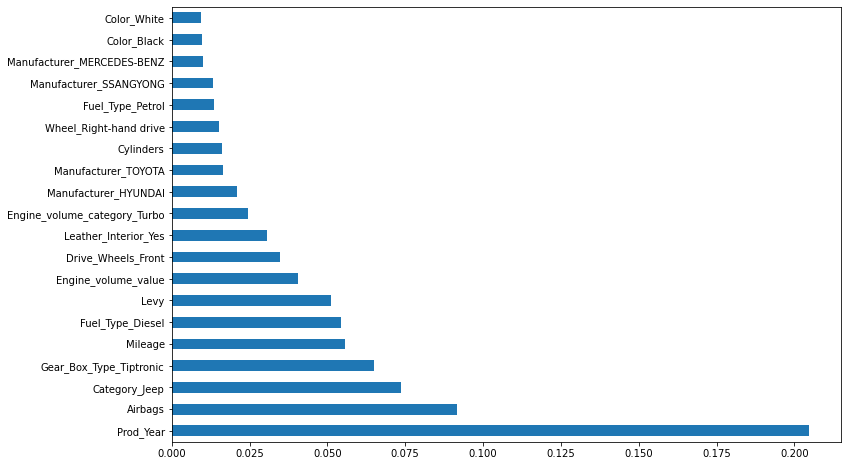

In [758]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [784]:
X = final_train[['Prod_Year', 'Airbags', 'Category_Jeep', 'Gear_Box_Type_Tiptronic', 'Mileage',
                'Fuel_Type_Diesel', 'Levy', 'Engine_volume_value', 'Drive_Wheels_Front', 'Leather_Interior_Yes',
                'Engine_volume_category_Turbo', 'Manufacturer_HYUNDAI', 'Cylinders', 'Wheel_Right-hand drive']]
y = final_train['Price']

Switch between x and X for Method 1 and Method 2 of feature selection

In [785]:
# Split the dataset to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [787]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lm_model = LinearRegression(normalize=True)

lm_model.fit(X_train, y_train)

predictions = lm_model.predict(X_test)

In [788]:
print("Accuracy on Training set: ",lm_model.score(X_train,y_train))
print("Accuracy on Testing set: ",lm_model.score(X_test,y_test))

Accuracy on Training set:  0.3737079014432263
Accuracy on Testing set:  0.35907877888798867


In [764]:
# For method 1

from sklearn.ensemble import RandomForestClassifier

Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

0.7131200474481572

In [791]:
# Random Forest Model for method 2

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestRegressor(n_estimators=100)

random_forest = rf.fit(X_train, y_train)

prediction_forest = random_forest.predict(X_test)

# acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [792]:
print("Accuracy on Training set: ",rf.score(X_train,y_train))
print("Accuracy on Testing set: ",rf.score(X_test,y_test))

Accuracy on Training set:  0.9572170457101802
Accuracy on Testing set:  0.7004451838782961


In [768]:
# pip install xgboost

In [800]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
xg_boost = xgb.fit(X_train, y_train, verbose=False)

prediction_xgb = xg_boost.predict(X_test)

In [801]:
print("Accuracy on Training set: ",xgb.score(X_train,y_train))
print("Accuracy on Testing set: ",xgb.score(X_test,y_test))

Accuracy on Training set:  0.8688337676446213
Accuracy on Testing set:  0.687733161685591


In [771]:
# np.sqrt(mean_squared_log_error(y_test, predictions)) #Linear Regression

In [793]:
np.sqrt(mean_squared_log_error(y_test, prediction_forest)) #Random Forest

0.6608092572896457

In [802]:
np.sqrt(mean_squared_log_error(y_test, prediction_xgb)) #XGBoost

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [803]:
prediction_xgb

array([ 4863.259 ,  7223.7017, 22554.002 , ..., 14534.374 ,  7933.1055,
       12895.241 ], dtype=float32)

In [778]:
# scaler.inverse_transform(test_predictions_xgb, copy = None) #transform back to original values

# Submission

In [195]:
# test_cpy = test

# test_cat = ['Cylinders', 'Airbags', 'Manufacturer', 'Model', 'Category', 'Leather interior',
#               'Fuel type', 'Gear box type', 'Color']

# for col in test_cat:
#     test_cpy[col] = pd.factorize(test_cpy[col])[0] + 1

In [796]:
test_feature = final_test[['Prod_Year', 'Airbags', 'Category_Jeep', 'Gear_Box_Type_Tiptronic', 'Mileage',
                'Fuel_Type_Diesel', 'Levy', 'Engine_volume_value', 'Drive_Wheels_Front', 'Leather_Interior_Yes',
                'Engine_volume_category_Turbo', 'Manufacturer_HYUNDAI', 'Cylinders', 'Wheel_Right-hand drive']]

# test_feature.head()

In [797]:
test_predictions = random_forest.predict(test_feature)

test_predictions

array([19249.266     , 14932.01      ,  7284.17      , ...,
        4943.858     , 39105.924     ,  3564.44133333])

In [804]:
test_predictions_xgb = xg_boost.predict(test_feature)

test_predictions_xgb

array([20703.588 , 18996.73  ,  8118.958 , ...,  5426.651 , 37865.875 ,
         670.2021], dtype=float32)

In [807]:
output = pd.DataFrame({'Price' : test_predictions_xgb})

output

,Price
0,20703.587891
1,18996.730469
2,8118.958008
3,6245.661621
4,4483.709473
...,...
8240,7369.498535
8241,25767.146484
8242,5426.650879
8243,37865.875000


In [809]:
output.to_csv('./my_submission_file.csv', index=False)